# 1. Exploratory Data Analysis (EDA)

## Importar módulos y librerías

In [2]:
import ast 
# módulo ast: helps Python applications to process trees of the Python abstract syntax grammar.
# The abstract syntax itself might change with each Python release; 
# this module helps to find out programmatically what the current grammar looks like.

import pandas as pd
# librería pandas: diseñada para la manipulación y el análisis de datos.
# El nombre «Pandas» es en realidad una contracción del término «Panel Data» para series de datos 
# que incluyen observaciones a lo largo de varios periodos de tiempo.
# pandas trabaja sobre dataframes: tablas de datos bidimensionales, donde cada columna contiene 
# los valores de una variable y cada fila contiene un conjunto de valores de cada columna.

import seaborn as sns
# librería seaborn: para visualización de datos, basada en matplotlib

import matplotlib.pyplot as plt
# módulo pyplot de la librería matplotlib

from datasets import load_dataset
# librería datasets: para cargar y manipular datasets de Hugging Face

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Cargar datos

In [3]:
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
# Conversión del dataset a un DataFrame de pandas

In [4]:
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


## Limpieza de datos

In [5]:
type(df.job_posted_date[0])
# La columna job_posted_date es un objeto de tipo string

str

In [6]:
# Convertir la columna job_posted_date a tipo datetime y guardar esos cambios en el DataFrame
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# Convertir la columna job_skills de string a lista
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Si no se utiliza apply, se generaría un error al intentar aplicar ast.literal_eval a toda la columna.

In [7]:
# Para chequear que la conversión se ha realizado correctamente
df['job_skills'][1]

['r', 'python', 'sql', 'nosql', 'power bi', 'tableau']

In [8]:
type(df['job_skills'][1])

list

## Visualización de datos con Matplotlib y Seaborn

Incorporamos seaborn para que el gráfico pueda mostrar mayores contrastes entre los valores (por ejemplo, cantidad de puestos por trabajo)

### Puestos de trabajo

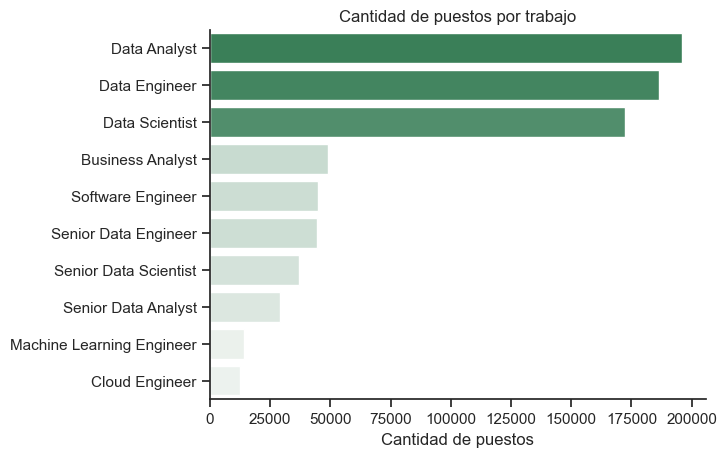

In [33]:
df_plot = df['job_title_short'].value_counts().to_frame()

sns.set_theme(style='ticks')
sns.barplot(
    data=df_plot, 
    x='count', 
    y='job_title_short', 
    hue='count', # Tono / gradación de color según la cantidad de puestos
    palette='light:seagreen', # En caso de querer revertir el orden de los colores, usar _r (light:seagreen_r)
    legend=False)
sns.despine() # Elimina los bordes del gráfico
plt.title('Cantidad de puestos por trabajo')
plt.xlabel('Cantidad de puestos')
plt.ylabel('')
plt.show()

### Países

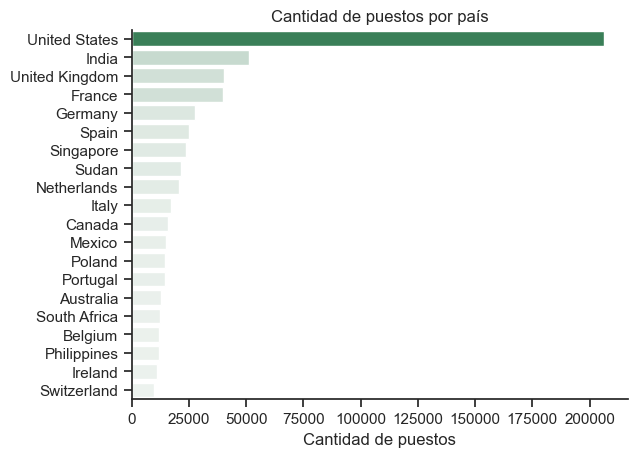

In [34]:
df_plot = df['job_country'].value_counts().to_frame().head(20)

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_country', hue='count', palette='light:seagreen', legend=False)
sns.despine()
plt.title('Cantidad de puestos por país')
plt.xlabel('Cantidad de puestos')
plt.ylabel('')
plt.show()

### Empresas

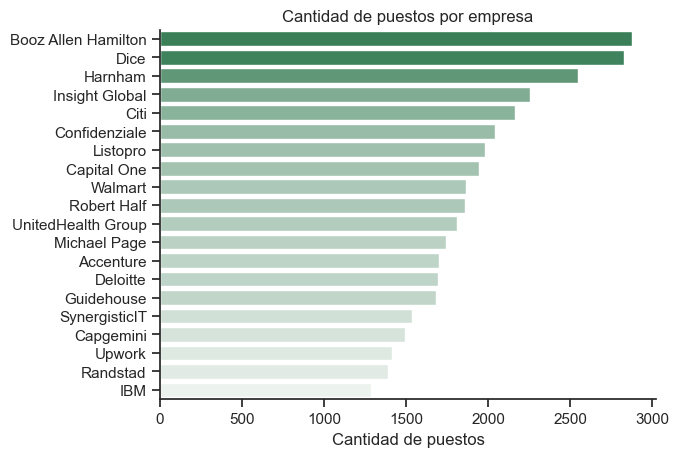

In [35]:
df_plot = df['company_name'].value_counts().to_frame()[1:].head(20)

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='light:seagreen', legend=False)
sns.despine()
plt.title('Cantidad de puestos por empresa')
plt.xlabel('Cantidad de puestos')
plt.ylabel('')
plt.show()

### Oportunidades de trabajo

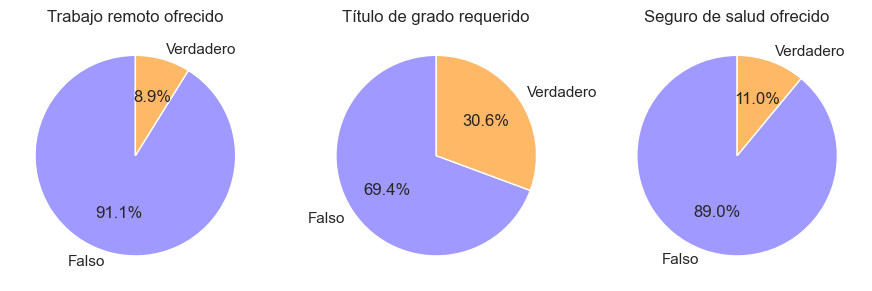

In [46]:
dict_column = {
    'job_work_from_home': 'Trabajo remoto ofrecido',
    'job_no_degree_mention': 'Título de grado requerido',
    'job_health_insurance': 'Seguro de salud ofrecido'
}

# ax: uno o varios objetos de tipo Axes (en este caso serán 3), que representan cada gráfico individual dentro de esa figura
# subplots: 1 fila y 3 columnas 
# figsize: ancho y alto de la figura en pulgadas
fig, ax = plt.subplots(1, 3, figsize=(11, 3.5))

# tupla column-title, key-value
# enumerate: para iterar sobre los elementos del diccionario y obtener el índice
for i, (column, title) in enumerate(dict_column.items()): 
    ax[i].pie(
        df[column].value_counts(), 
        labels=['Falso', 'Verdadero'], 
        autopct='%1.1f%%', # auto porcentaje: muestra el porcentaje de cada segmento
        startangle=90,  # startangle: para que el primer segmento comience desde arriba
        colors=["#a099ff", "#ffb866"])
    ax[i].set_title(title)

plt.show()

# EDA para Data Analysts en Argentina

### Filtrar para puestos en Argentina

In [92]:
df_DA_ARG = df[(df['job_country'] == 'Argentina') & (df['job_title_short'] == 'Data Analyst')]

In [93]:
df_DA_ARG.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
2023,Data Analyst,Data Analyst,Anywhere,via LinkedIn,Full-time,True,Argentina,2023-03-03 13:38:00,False,False,Argentina,None,NaN,NaN,Job Duck,"[sql, python, javascript, excel, sheets, power...","{'analyst_tools': ['excel', 'sheets', 'power b..."
3459,Data Analyst,Data Analyst (USD & Remote),Anywhere,via LinkedIn,Full-time,True,Argentina,2023-09-21 13:37:40,False,False,Argentina,None,NaN,NaN,Vintti,"[sql, excel, sheets, flow]","{'analyst_tools': ['excel', 'sheets'], 'other'..."
4407,Data Analyst,Marketing Data Analyst,Argentina,"via Trabajo.org - Vacantes De Empleo, Trabajo",Full-time,False,Argentina,2023-08-03 13:11:37,True,False,Argentina,None,NaN,NaN,IT Scout,None,None
5187,Data Analyst,Data Analyst,Argentina,via LinkedIn,Full-time,False,Argentina,2023-04-28 13:18:43,True,False,Argentina,None,NaN,NaN,Tata Consultancy Services,"[sql, nosql, neo4j, gcp, azure, bigquery]","{'cloud': ['gcp', 'azure', 'bigquery'], 'datab..."
6663,Data Analyst,Data Analyst,"Buenos Aires, Argentina",via BeBee,Full-time,False,Argentina,2023-12-22 13:14:46,False,False,Argentina,None,NaN,NaN,Universidad de Palermo,"[sql, python, tableau]","{'analyst_tools': ['tableau'], 'programming': ..."


In [94]:
df_DA_ARG.count()

job_title_short          1273
job_title                1273
job_location             1273
job_via                  1273
job_schedule_type        1268
job_work_from_home       1273
search_location          1273
job_posted_date          1273
job_no_degree_mention    1273
job_health_insurance     1273
job_country              1273
salary_rate                 4
salary_year_avg             4
salary_hour_avg             0
company_name             1273
job_skills               1032
job_type_skills          1032
dtype: int64

In [95]:
df_DA_ARG.isnull().sum()

job_title_short             0
job_title                   0
job_location                0
job_via                     0
job_schedule_type           5
job_work_from_home          0
search_location             0
job_posted_date             0
job_no_degree_mention       0
job_health_insurance        0
job_country                 0
salary_rate              1269
salary_year_avg          1269
salary_hour_avg          1273
company_name                0
job_skills                241
job_type_skills           241
dtype: int64

### Filtrar para puestos en Argentina

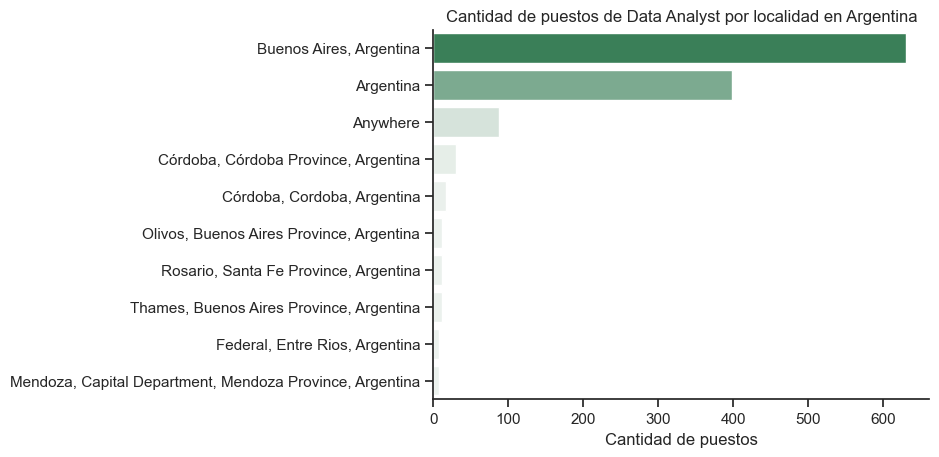

In [96]:
df_plot = df_DA_ARG['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='light:seagreen', legend=False)
sns.despine()
plt.title('Cantidad de puestos de Data Analyst por localidad en Argentina')
plt.xlabel('Cantidad de puestos')
plt.ylabel('')
plt.show()

### Limpieza de la columna job_location

Luego de graficar la cantidad de puestos de Data Analyst por localidad, nos encontramos que hay valores repetidos o incoherentes: "Córdoba, Cordoba, Argentina" y "Córdoba, Córdoba Province, Argentina" se podrían unificar, así como "Olivos, Buenos Aires Province, Argentina" podría estar incluido dentro de "Buenos Aires, Argentina".

In [99]:
df_DA_ARG['job_location'] = df_DA_ARG['job_location'].str.replace('Córdoba, Córdoba Province, Argentina', 'Córdoba')
df_DA_ARG['job_location'] = df_DA_ARG['job_location'].str.replace('Córdoba, Cordoba, Argentina', 'Córdoba')
df_DA_ARG['job_location'] = df_DA_ARG['job_location'].str.replace('Thames, Buenos Aires Province, Argentina', 'Buenos Aires')
df_DA_ARG['job_location'] = df_DA_ARG['job_location'].str.replace('Olivos, Buenos Aires Province, Argentina', 'Buenos Aires')
df_DA_ARG['job_location'] = df_DA_ARG['job_location'].str.replace('Munro, Buenos Aires Province, Argentina', 'Buenos Aires')
df_DA_ARG['job_location'] = df_DA_ARG['job_location'].str.replace('Villa de Mayo, Buenos Aires Province, Todo el país', 'Buenos Aires')
df_DA_ARG['job_location'] = df_DA_ARG['job_location'].str.replace('Bahía Blanca, Buenos Aires Province, Todo el país', 'Buenos Aires')
df_DA_ARG['job_location'] = df_DA_ARG['job_location'].str.replace('Saavedra, Buenos Aires Province, Todo el país', 'Buenos Aires')
df_DA_ARG['job_location'] = df_DA_ARG['job_location'].str.replace('Longchamps, Buenos Aires Province, Todo el país', 'Buenos Aires')
df_DA_ARG['job_location'] = df_DA_ARG['job_location'].str.replace('Buenos Aires, Argentina', 'Buenos Aires')
df_DA_ARG['job_location'] = df_DA_ARG['job_location'].str.replace('Neuquen, Neuquén Province, Todo el país', 'Neuquen')
df_DA_ARG['job_location'] = df_DA_ARG['job_location'].str.replace('Rosario, Santa Fe Province, Argentina', 'Santa Fe')
df_DA_ARG['job_location'] = df_DA_ARG['job_location'].str.replace('Santa Fe, Santa Fe Province, Todo el país', 'Santa Fe')
df_DA_ARG['job_location'] = df_DA_ARG['job_location'].str.replace('Federal, Entre Rios, Argentina', 'Entre Rios')
df_DA_ARG['job_location'] = df_DA_ARG['job_location'].str.replace('Mendoza, Capital Department, Mendoza Province, Argentina', 'Mendoza')
df_DA_ARG['job_location'] = df_DA_ARG['job_location'].str.replace('Argentina, Santiago del Estero Province, Argentina', 'Santiago del Estero')
df_DA_ARG['job_location'] = df_DA_ARG['job_location'].str.replace('Salta, Salta Province, Argentina', 'Salta')
df_DA_ARG['job_location'] = df_DA_ARG['job_location'].str.replace('San Juan, San Juan Province, Argentina', 'San Juan')
df_DA_ARG['job_location'] = df_DA_ARG['job_location'].str.replace('Argentina', 'Todo el país')
df_DA_ARG['job_location'] = df_DA_ARG['job_location'].str.replace('Anywhere', 'Todo el país')

C:\Users\Admin\AppData\Local\Temp\ipykernel_9236\3996397970.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_DA_ARG['job_location'] = df_DA_ARG['job_location'].str.replace('Córdoba, Córdoba Province, Argentina', 'Córdoba')
C:\Users\Admin\AppData\Local\Temp\ipykernel_9236\3996397970.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_DA_ARG['job_location'] = df_DA_ARG['job_location'].str.replace('Córdoba, Cordoba, Argentina', 'Córdoba')
C:\Users\Admin\AppData\Local\Temp\ipykernel_9236\3996397970.py:

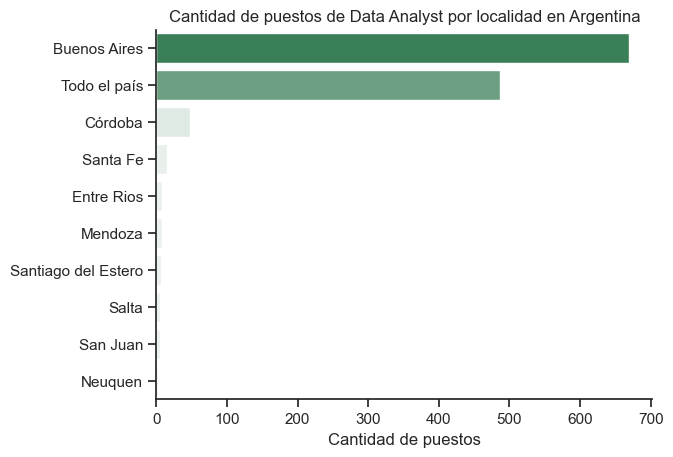

In [100]:
df_plot = df_DA_ARG['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='light:seagreen', legend=False)
sns.despine()
plt.title('Cantidad de puestos de Data Analyst por localidad en Argentina')
plt.xlabel('Cantidad de puestos')
plt.ylabel('')
plt.show()

### Oportunidades de trabajo en Argentina

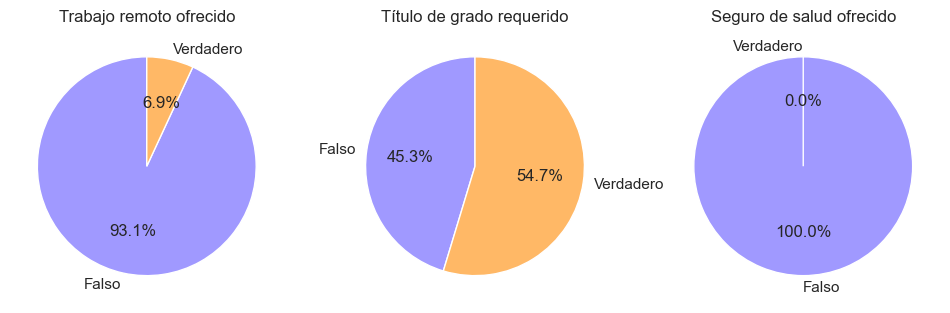

In [110]:
dict_column = {
    'job_work_from_home': 'Trabajo remoto ofrecido',
    'job_no_degree_mention': 'Título de grado requerido',
    'job_health_insurance': 'Seguro de salud ofrecido'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()): 
    values = df_DA_ARG[column].value_counts().reindex([False, True], fill_value=0)
    ax[i].pie(
        values, 
        labels=['Falso', 'Verdadero'], 
        autopct='%1.1f%%',
        startangle=90,
        colors=["#a099ff", "#ffb866"])
    ax[i].set_title(title)

plt.show()